In [1]:
## 🧪 Step 1: Load Merged Dataset

import pandas as pd

merged_df = pd.read_csv(r'C:\Users\drhum\OneDrive\Desktop\Fall 2025\CMSE 830 Foundation for Data Science\Project\cmse830_fds\data\merged_health_data.csv')


In [2]:
## 🧪 Step 2: Prepare Features and Targets

# Convert missing targets to NaN and drop them
heart_data = merged_df.dropna(subset=['target'])
stroke_data = merged_df.dropna(subset=['stroke'])

# Select features
heart_features = heart_data[['age', 'sex', 'heart_disease']]
stroke_features = stroke_data[['age', 'sex', 'heart_disease']]

# Targets
heart_target = heart_data['target'].astype(int)
stroke_target = stroke_data['stroke'].astype(int)


In [3]:
## 🧪 Step 3: Train-Test Split

from sklearn.model_selection import train_test_split

Xh_train, Xh_test, yh_train, yh_test = train_test_split(heart_features, heart_target, test_size=0.2, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(stroke_features, stroke_target, test_size=0.2, random_state=42)


In [4]:
## 🧪 Step 4: Train Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Heart Disease Model
heart_model = RandomForestClassifier(random_state=42)
heart_model.fit(Xh_train, yh_train)

# Stroke Model
stroke_model = LogisticRegression(max_iter=1000)
stroke_model.fit(Xs_train, ys_train)


LogisticRegression(max_iter=1000)

In [5]:
## 🧪 Step 5: Evaluate Performance

from sklearn.metrics import classification_report, confusion_matrix

# Heart Disease
yh_pred = heart_model.predict(Xh_test)
print("Heart Disease Model Report:")
print(classification_report(yh_test, yh_pred))

# Stroke
ys_pred = stroke_model.predict(Xs_test)
print("Stroke Risk Model Report:")
print(classification_report(ys_test, ys_pred))


Heart Disease Model Report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        32
           1       0.48      0.48      0.48        29

    accuracy                           0.51        61
   macro avg       0.51      0.51      0.51        61
weighted avg       0.51      0.51      0.51        61

Stroke Risk Model Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\drhum\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drhum\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drhum\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


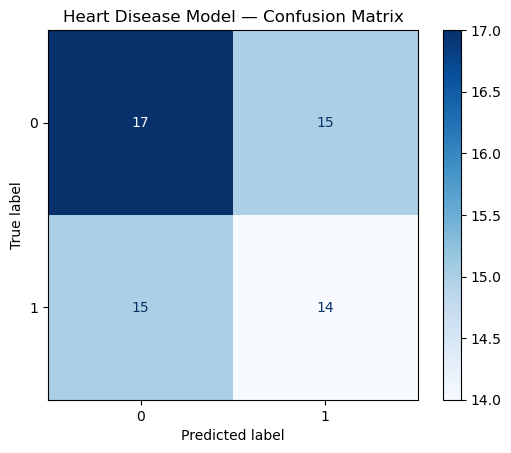

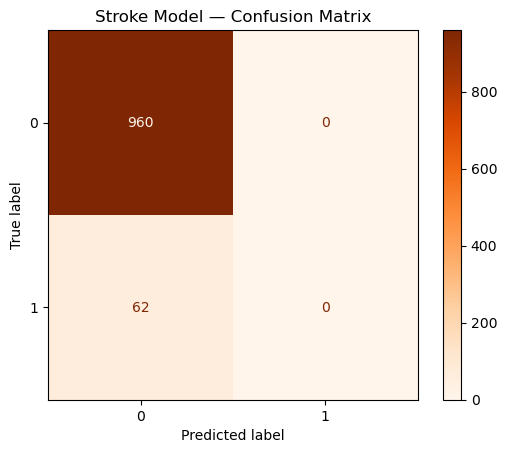

In [6]:
## 🔹 Step 6: Visualize Confusion Matrices

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Heart Disease
ConfusionMatrixDisplay.from_estimator(heart_model, Xh_test, yh_test, cmap='Blues')
plt.title('Heart Disease Model — Confusion Matrix')
plt.show()

# Stroke
ConfusionMatrixDisplay.from_estimator(stroke_model, Xs_test, ys_test, cmap='Oranges')
plt.title('Stroke Model — Confusion Matrix')
plt.show()



In [9]:
import os
import joblib

# Ensure the app/ folder exists
os.makedirs("app", exist_ok=True)

# Save your trained models
joblib.dump(heart_model, "app/heart_model.pkl")
joblib.dump(stroke_model, "app/stroke_model.pkl")



['app/stroke_model.pkl']